In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
(X_train,Y_train),(X_test,Y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


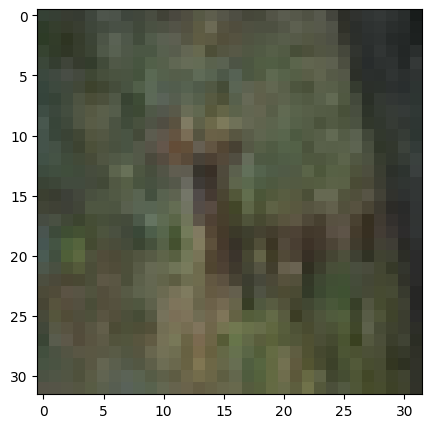

In [5]:
# X_test.shape
plt.figure(figsize=(5,5))
plt.imshow(X_train[10])

In [6]:
classes =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
# Y_train[20:40]
Y_train = Y_train.reshape(-1,)

Y_train[2:9]

array([9, 4, 1, 1, 2, 7, 8], dtype=uint8)

In [8]:
def plot_sample(X,Y,index):
    plt.figure(figsize=(5,6))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

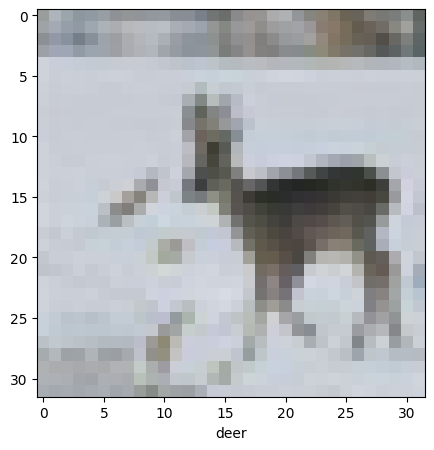

In [9]:
plot_sample(X_train,Y_train,20)

> ### Normalizing the pixels by dividing it by 255

In [10]:
 X_train = X_train / 255.0
 X_test = X_test / 255.0    

# X_train[30]

> #### Creating a simple model to find the performance of the ANN 

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(2000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy','mse'])

model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 11s 4ms/step - loss: 1.8098 - accuracy: 0.3558 - mse: 24.3680
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6205 - accuracy: 0.4256 - mse: 24.3573
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5393 - accuracy: 0.4577 - mse: 24.3489
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4782 - accuracy: 0.4808 - mse: 24.3445
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4292 - accuracy: 0.4975 - mse: 24.3420


> ### Using a CNN instead of a ANN for classification of the CIFAR dataset

In [12]:
CNN = keras.Sequential()
CNN.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
CNN.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
CNN.add(layers.MaxPooling2D(pool_size=(2,2)))
CNN.add(layers.Dropout(0.4))
CNN.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
CNN.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
CNN.add(layers.MaxPooling2D(pool_size=(2,2)))
CNN.add(layers.Dropout(0.4))
CNN.add(layers.Flatten())
CNN.add(layers.Dense(1024,activation='relu'))
CNN.add(layers.Dense(1024,activation='relu'))
CNN.add(layers.Dense(10,activation = 'softmax'))

print(CNN.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 64)        3136      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       131200    
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         262272    
                                                      

In [13]:
CNN.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy','mae','mse'])

In [16]:
CNN.fit(X_train,Y_train,epochs=40)

Epoch 1/40
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5925 - accuracy: 0.7998 - mae: 4.4200 - mse: 27.6735
Epoch 2/40
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5799 - accuracy: 0.7997 - mae: 4.4200 - mse: 27.6739
Epoch 3/40
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5777 - accuracy: 0.8017 - mae: 4.4200 - mse: 27.6742
Epoch 4/40
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5774 - accuracy: 0.8014 - mae: 4.4200 - mse: 27.6742
Epoch 5/40
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5711 - accuracy: 0.8048 - mae: 4.4200 - mse: 27.6745
Epoch 6/40
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5653 - accuracy: 0.8049 - mae: 4.4200 - mse: 27.6748
Epoch 7/40
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5518 - accuracy: 0.8111 - mae: 4.4200 - mse: 27.6754
Epoch 8/40
1563/1563 [==============================] - 12s 8ms/step - loss:

313/313 [==============================] - 1s 4ms/step - loss: 0.8571 - accuracy: 0.7524 - mae: 4.4200 - mse: 27.6773


[0.8570740222930908,
 0.7523999810218811,
 4.4199981689453125,
 27.677303314208984]

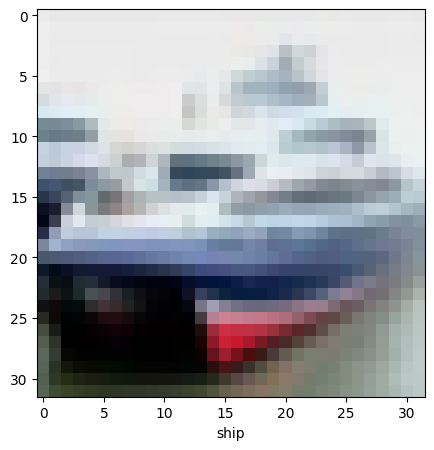

In [28]:
# model_mtd2 = pickle.load(open("desired-model-file-name.pkl", "rb"))
# pickle.dump(model, open("desired-model-file-name.pkl", "wb"))
plot_sample(X_test,Y_test,1)
CNN.evaluate(X_test,Y_test.reshape(-1,1))

In [31]:
# Y_test[:5]
Y_pred = CNN.predict(X_test)
Y_pred

313/313 [==============================] - 1s 3ms/step


array([[1.5008791e-03, 1.3537088e-04, 9.1301575e-03, ..., 5.5857808e-03,
        5.7017518e-04, 1.7271643e-03],
       [5.5781817e-03, 1.2623664e-03, 5.0609615e-05, ..., 2.1255182e-06,
        9.9197561e-01, 1.0811110e-03],
       [4.3879349e-02, 6.8703823e-02, 7.9105236e-03, ..., 1.0428736e-03,
        8.4158880e-01, 2.1192344e-02],
       ...,
       [4.2983746e-12, 2.0779902e-09, 1.7807726e-07, ..., 1.6695159e-04,
        1.1636738e-10, 3.3237905e-11],
       [5.6868706e-05, 9.9804747e-01, 7.7486027e-04, ..., 4.9710516e-06,
        1.0380421e-03, 6.5288463e-05],
       [2.9955059e-14, 4.8186275e-14, 4.3486595e-15, ..., 9.9999988e-01,
        9.6154760e-12, 2.4245243e-11]], dtype=float32)

In [48]:
Y_classes = [np.argmax(element) for element in Y_pred]
Y_classes[:10]

[3, 8, 8, 0, 6, 5, 9, 6, 3, 9]

In [39]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

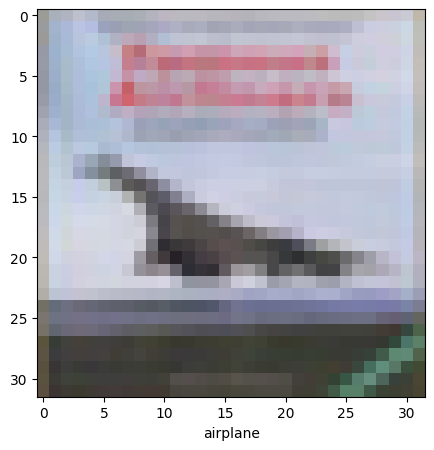

In [46]:
plot_sample(X_test,Y_test,3)

In [47]:
classes

classes[Y_classes[3]]

'airplane'